# Grassmann-Stiefel Eigenmaps

### Example

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn.datasets import make_s_curve, make_swiss_roll

from gse import GSE

In [2]:
N = 1000
k = 25

X, c = make_swiss_roll(n_samples=N)

In [3]:
X.shape

(1000, 3)

Text(0.5,0.92,u'Swiss roll')

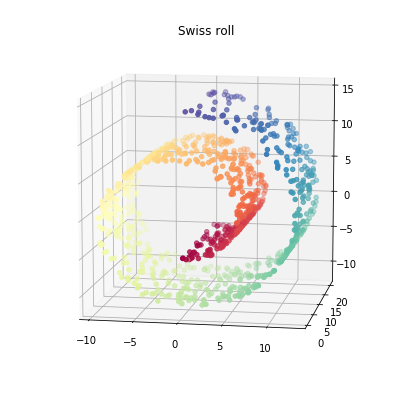

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap=plt.cm.Spectral)
plt.title('Swiss roll')

In [5]:
gse = GSE(n_neighbors=k, max_iter=100, sigma=3)
Q, H, G = gse.fit(X)

### Embedding mapping

In [6]:
z = gse.transform(X)

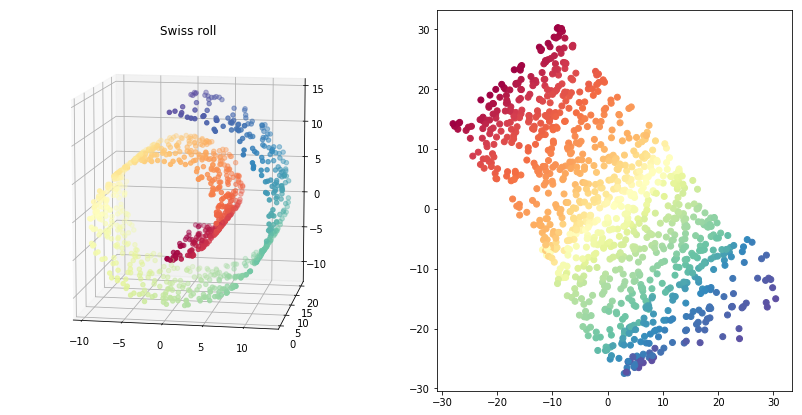

In [7]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='3d')
ax.view_init(10, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap=plt.cm.Spectral)
plt.title('Swiss roll')

plt.subplot(122)
plt.scatter(z[:, 0], z[:, 1], c=c, cmap=plt.cm.Spectral)
plt.show()

### Reconstruction mapping

In [8]:
data_to_reconstruct = np.copy(z)
data_to_reconstruct.shape

(1000, 2)

In [9]:
X_rec = gse.reconstruct(data_to_reconstruct, z)

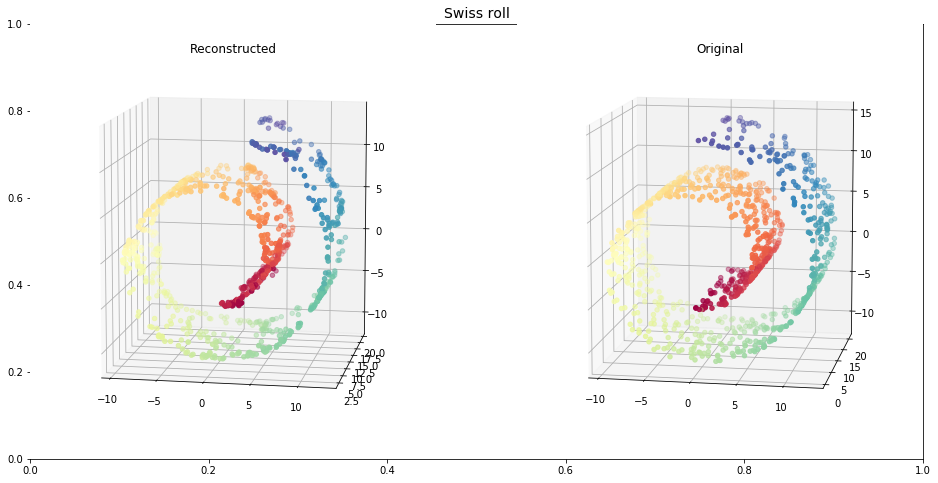

In [10]:
fig = plt.figure(figsize=(16,8))
plt.title("Swiss roll", fontsize=14)

ax = fig.add_subplot(121, projection='3d')
ax.view_init(10, -80)
ax.scatter(X_rec[:, 0], X_rec[:, 1], X_rec[:, 2], c=c, cmap=plt.cm.Spectral)
plt.title("Reconstructed")

ax = fig.add_subplot(122, projection='3d')
ax.view_init(10, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap=plt.cm.Spectral)
plt.title("Original")

plt.show()